# Day 08. Exercise 05
# Clustering

## 0. Imports

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [122]:
df = pd.read_csv('../data/regression.csv')
df.drop('pageviews', axis=1, inplace=True)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

1. 
Кластеризация: алгоритмы k-means и c-means теория: https://habr.com/ru/post/67078/ Метод выделения группы объектов, используя как меру расстояние. KMeans - наиболее простой, но не очень точный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров. Нюансы:

необходимо заранее знать количество кластеров
алгоритм чувствителен к выбору начальных центров код: https://habr.com/ru/company/otus/blog/666376/

<Axes: title={'center': '8 clusters'}, xlabel='num_commits', ylabel='AVG(diff)'>

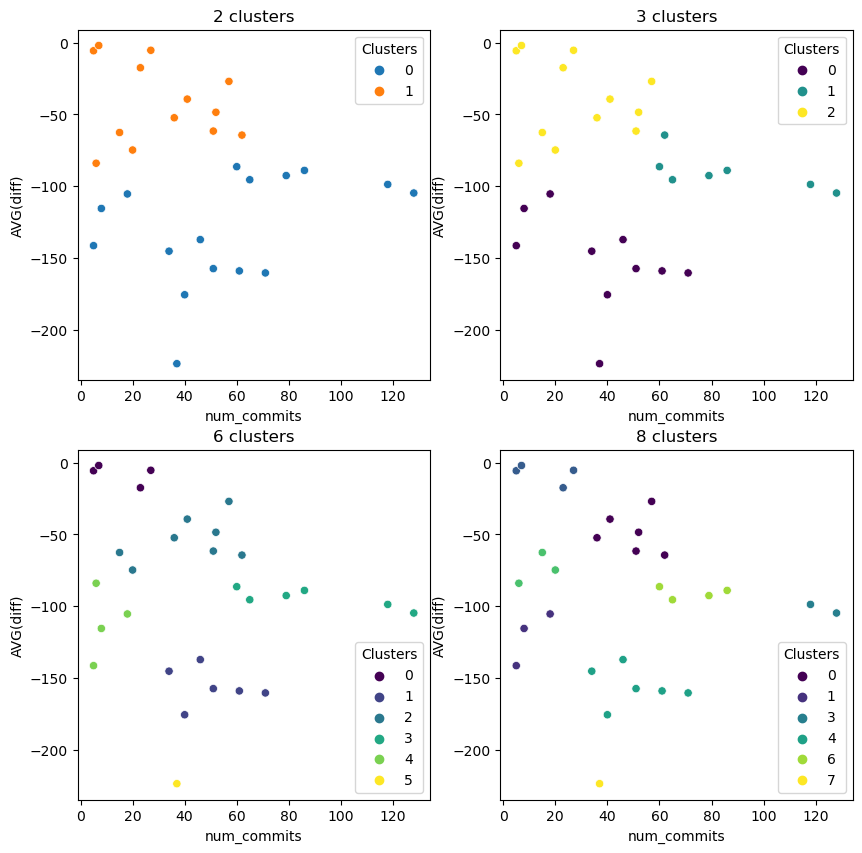

In [123]:
# 2,3

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 10))
ax=plt.subplot(2, 2, 1)
plt.title('2 clusters')
km=KMeans(n_clusters=2, random_state=21)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_ # можно посмотреть центральный элемент кластера
df['Clusters'] = km.labels_
sns.scatterplot(data=df, x='num_commits', y='AVG(diff)',hue='Clusters')


plt.subplot(2, 2, 2)
plt.title('3 clusters')
km=KMeans(n_clusters=3, random_state=21)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_
df['Clusters'] = km.labels_
sns.scatterplot(data=df, x='num_commits', y='AVG(diff)',hue='Clusters', palette='viridis')

plt.subplot(2, 2, 3)
plt.title('6 clusters')
km2=KMeans(n_clusters=6, random_state=21)
y_predicted2 = km2.fit_predict(df[['num_commits', 'AVG(diff)']])
km2.cluster_centers_
df['Clusters'] = km2.labels_
sns.scatterplot(data=df, x='num_commits', y='AVG(diff)',hue='Clusters', palette='viridis')

plt.subplot(2, 2, 4)
plt.title('8 clusters')
km=KMeans(n_clusters=8, random_state=21)
y_predicted = km.fit_predict(df[['num_commits', 'AVG(diff)']])
km.cluster_centers_
df['Clusters'] = km.labels_
sns.scatterplot(data=df, x='num_commits', y='AVG(diff)',hue='Clusters', palette='viridis')

silhouette_score используется для определения дистанции между кластерами и выбора их оптимального количества. https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

In [124]:
df = df[['num_commits', 'AVG(diff)']]
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=21).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df,labels,random_state=21)))

Silhouette score for k(clusters) = 2 is 0.41787451607810133
Silhouette score for k(clusters) = 3 is 0.4390170957153295
Silhouette score for k(clusters) = 4 is 0.44414602561947886
Silhouette score for k(clusters) = 5 is 0.4760630149229996
Silhouette score for k(clusters) = 6 is 0.44572484120013867
Silhouette score for k(clusters) = 7 is 0.4964107297576806
Silhouette score for k(clusters) = 8 is 0.5077985556562201
Silhouette score for k(clusters) = 9 is 0.47576869039147557


## 3. DBSCAN

1. Check the [documentation](https://machinelearningmastery.ru/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc/) about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

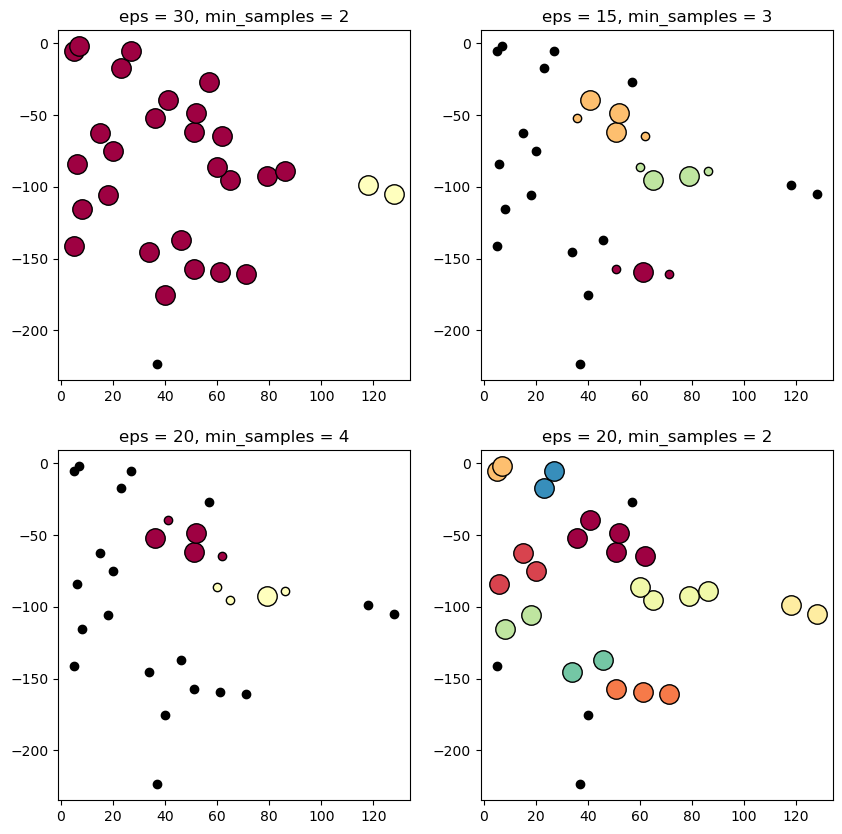

In [125]:
X = df[['num_commits', 'AVG(diff)']].values

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('eps = 30, min_samples = 2')
db = DBSCAN(eps = 30, min_samples = 2).fit(X)  
unique_labels = set(db.labels_)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = db.labels_ == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,)

plt.subplot(2, 2, 2)
plt.title('eps = 15, min_samples = 3')
db = DBSCAN(eps = 15, min_samples = 3).fit(X)  
unique_labels = set(db.labels_)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = db.labels_ == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,)
    
plt.subplot(2, 2, 3)
plt.title('eps = 20, min_samples = 4')
db = DBSCAN(eps = 20, min_samples = 4).fit(X)  
unique_labels = set(db.labels_)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = db.labels_ == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,)
    
plt.subplot(2, 2, 4)
plt.title('eps = 20, min_samples = 2')
db = DBSCAN(eps = 20, min_samples = 2).fit(X)  
unique_labels = set(db.labels_)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = db.labels_ == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,)

In [126]:
metrics.silhouette_score(X, db.labels_)

0.38339641455696616

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

Text(0.5, 1.0, '8 clusters')

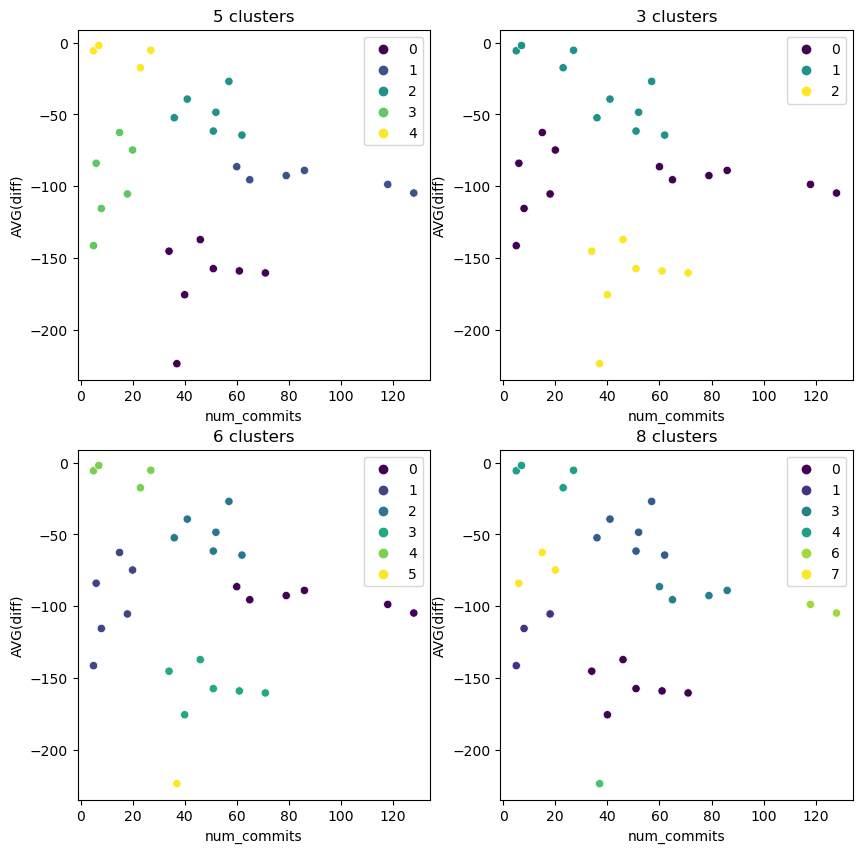

In [127]:
plt.figure(figsize=(10, 10))
ax=plt.subplot(2, 2, 1)
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df, 
                palette='viridis',
                hue=data_labels).set_title('5 clusters')

ax=plt.subplot(2, 2, 2)
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df, 
                palette='viridis',
                hue=data_labels).set_title('3 clusters')

ax=plt.subplot(2, 2, 3)
hierarchical_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df, 
                palette='viridis',
                hue=data_labels).set_title('6 clusters')

ax=plt.subplot(2, 2, 4)
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)
hierarchical_cluster.labels_
data_labels = hierarchical_cluster.labels_
sns.scatterplot(x='num_commits', 
                y='AVG(diff)', 
                data=df, 
                palette='viridis',
                hue=data_labels).set_title('8 clusters')

In [128]:
for i in range(4,10):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels = hierarchical_cluster.fit_predict(df)
    print ("Silhouette score for n_clusters = "+str(i)+" is "+str(metrics.silhouette_score(df,labels)))

Silhouette score for n_clusters = 4 is 0.4448362750283643
Silhouette score for n_clusters = 5 is 0.46383015199381467
Silhouette score for n_clusters = 6 is 0.4527145606287827
Silhouette score for n_clusters = 7 is 0.4865808853184314
Silhouette score for n_clusters = 8 is 0.5077985556562201
Silhouette score for n_clusters = 9 is 0.47576869039147557


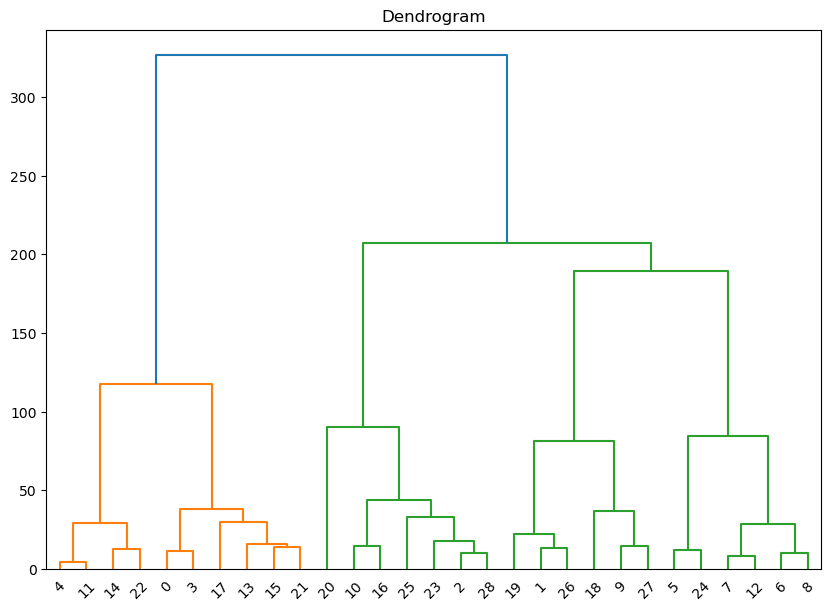

In [129]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
selected_data = df
clusters = shc.linkage(df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()